In [49]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

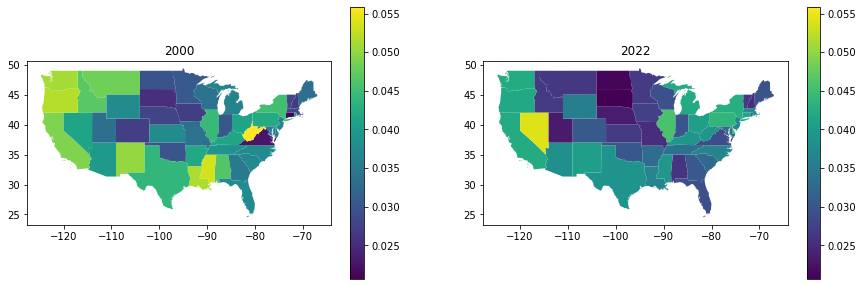

In [85]:

df  = pd.read_csv("data/county_unemployment.csv")
df = df[df.Year.isin([2000,2022])]
df = df.groupby(["State","Year"])[["Employed","Unemployed"]].sum() #summarize county level data
df["Unemployment Rate"] = df["Unemployed"]/(df["Employed"]+df["Unemployed"])
df = df[["Unemployment Rate"]].reset_index()
df = df.pivot(index="State",columns="Year",values="Unemployment Rate").reset_index()
gdf = gpd.read_file("data/cb_2018_us_state_500k")
all=gdf.merge(df,how="right",left_on="STUSPS",right_on="State")
contig = all[~all.State.isin(["HI","AK"])] # I'm just being lazy and not including Hawaii or Alaska
min_unemployment = min(min(contig[2000]),min(contig[2022]))
max_unemployment = max(max(contig[2000]),max(contig[2022]))

f,axs = plt.subplots(1,2,figsize=(15,5))
contig.plot(column=2000,ax=axs[0],vmin=min_unemployment,vmax=max_unemployment,legend=True)
axs[0].set_title("2000")
contig.plot(column=2022,ax=axs[1],vmin=min_unemployment,vmax=max_unemployment,legend=True)
axs[1].set_title("2022")

plt.show()
